# New Wheels Vehicle Sale Project: Lawrence Williams
#### Sunday March 27, 2022

In [1]:
# Import the packages for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.set(font_scale=1.25)

### Reading in the data just to get a view before starting DDL and Ingestion

In [2]:
df1 = pd.read_csv('../Data/new_wheels_sales_qtr_1.csv')
df2 = pd.read_csv('../Data/new_wheels_sales_qtr_2.csv')
df3 = pd.read_csv('../Data/new_wheels_sales_qtr_3.csv')
df4 = pd.read_csv('../Data/new_wheels_sales_qtr_4.csv')

In [3]:
df1.shape[0]+df2.shape[0]+df3.shape[0]+df4.shape[0]

1000

In [4]:
# Bring the dataframes together
df = pd.concat([df1,df2,df3,df4], ignore_index=True)
df.shape

(1000, 31)

### Looking at the data and running some tests to validate SQL logic, in python
#### Obviously couldn't do this with a much larger dataset, but I would take a subsample to compare/contrast in actual practice. Developing data piplines/archtecture. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   shipper_id               1000 non-null   int64  
 1   shipper_name             1000 non-null   object 
 2   shipper_contact_details  1000 non-null   object 
 3   product_id               1000 non-null   int64  
 4   vehicle_maker            1000 non-null   object 
 5   vehicle_model            1000 non-null   object 
 6   vehicle_color            1000 non-null   object 
 7   vehicle_model_year       1000 non-null   int64  
 8   vehicle_price            1000 non-null   float64
 9   quantity                 1000 non-null   int64  
 10  discount                 1000 non-null   float64
 11  customer_id              1000 non-null   object 
 12  customer_name            1000 non-null   object 
 13  gender                   1000 non-null   object 
 14  job_title                

In [6]:
# Validating question 1
q1_validate = df.groupby('state')['customer_id'].nunique().reset_index()
q1_validate = q1_validate.sort_values('customer_id', ascending=False)
q1_validate.head(5)

,state,customer_id
41,Texas,97
4,California,97
9,Florida,86
32,New York,69
8,District of Columbia,35


In [7]:
# Creating our numeric feedback and revenue similarly to the SQL logic used
conditions = [
    df['customer_feedback']=='Very Bad',
    df['customer_feedback']=='Bad',
    df['customer_feedback']=='Okay',
    df['customer_feedback']=='Good',
    df['customer_feedback']=='Very Good'
]
values = [1,2,3,4,5]
df['numeric_feedback'] = np.select(conditions, values)

df['revenue'] = df['vehicle_price'] * (df['discount']/100)

In [8]:
# Validating question 2
q2_validate = df.groupby('quarter_number')['numeric_feedback'].mean().round(2)
q2_validate

quarter_number
1    3.55
2    3.35
3    2.96
4    2.40
Name: numeric_feedback, dtype: float64

In [9]:
# Validating question 5
q5_validate = df.groupby(['state', 'vehicle_maker'])['order_id'].count()
q5_validate

state      vehicle_maker
Alabama    Buick            1
           Chevrolet        2
           Dodge            5
           Ford             3
           Honda            1
                           ..
Wisconsin  Honda            1
           Mazda            1
           Nissan           1
           Pontiac          1
Wyoming    Buick            1
Name: order_id, Length: 624, dtype: int64

In [10]:
# Validating question 4
q4_validate = df.groupby('vehicle_maker')['order_id'].count().reset_index()
q4_validate = q4_validate.sort_values('order_id', ascending=False).head(5)
q4_validate

,vehicle_maker,order_id
8,Chevrolet,83
15,Ford,63
51,Toyota,52
42,Pontiac,50
12,Dodge,50


### I am confident in my validated SQL results now. I will move on to creating the visualizations for results. Starting with reading in all of my SQL results saved as csv files.


In [34]:
sql_q1 = pd.read_csv('../data/q1_results.csv')
sql_q2 = pd.read_csv('../data/q2_results.csv')
sql_q3 = pd.read_csv('../data/q3_results.csv')
sql_q3b = pd.read_csv('../data/q3b_results.csv')
sql_q4 = pd.read_csv('../data/q4_results.csv')
sql_q5 = pd.read_csv('../data/q5_results.csv')
sql_q6 = pd.read_csv('../data/q6_results.csv')
sql_q7 = pd.read_csv('../data/q7_results.csv')
sql_q8 = pd.read_csv('../data/q8_results.csv')
sql_q9 = pd.read_csv('../data/q9_results.csv')
sql_q10 = pd.read_csv('../data/q10_results.csv')

In [12]:
# Start with the overview
print('revenue: ',round(df['revenue'].sum(),2))
print('Q4 revenue: ',round(df[df['quarter_number']==4]['revenue'].sum(),2))
print('avg rating: ',round(df['numeric_feedback'].mean(),2))
print('%Good FB: ',round(df[df['numeric_feedback']>3].shape[0]/df.shape[0],2))

revenue:  509570.01
Q4 revenue:  97634.94
avg rating:  3.13
%Good FB:  0.44


In [13]:
# Renaming columns to make visuals prettier
sql_q1.rename(columns={'STATE':'Market', 'customer_count':'Customer Count'}, inplace=True)
sql_q1.head()

,Market,Customer Count
0,Texas,97
1,California,97
2,Florida,86
3,New York,69
4,District of Columbia,35


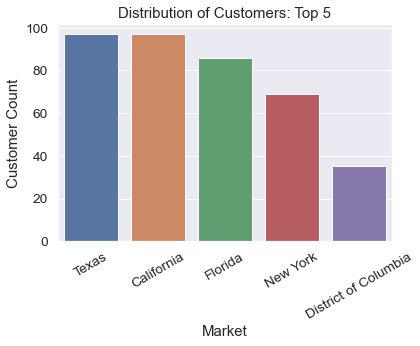

In [14]:
# Plot the distribution of customers across states from the SQL results question 1

ax_q1 = sns.barplot(x="Market", y="Customer Count", data=sql_q1.head())
ax_q1.set(title='Distribution of Customers: Top 5')
ax_q1.set_xticklabels(ax_q1.get_xticklabels(),rotation = 30)
plt.show()

In [15]:
# Renaming columns to make visuals prettier
sql_q2.rename(columns={'yearly_quarter':'Quarter', 'average_rating':'Average Rating'}, inplace=True)
sql_q2.head()

,Quarter,Average Rating
0,1st Quarter,3.55
1,2nd Quarter,3.35
2,3rd Quarter,2.96
3,4th Quarter,2.40


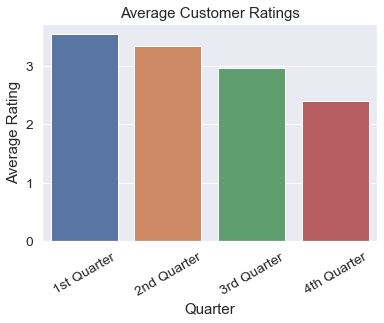

In [16]:
# Plot the average customer ratings by quarter from the SQL results question 2
ax_q2 = sns.barplot(x="Quarter", y="Average Rating", data=sql_q2)
ax_q2.set(title='Average Customer Ratings')
ax_q2.set_xticklabels(ax_q2.get_xticklabels(),rotation = 30)
plt.show()

In [17]:
# Renaming columns to make visuals prettier
sql_q3.rename(columns={'SHIP_DATE':'Date', 'average_feedback':'Average Feedback'}, inplace=True)
sql_q3

,Date,CUSTOMER_ID,Average Feedback
0,2018-01-15,11673-165,5.0
1,2018-01-17,60512-2015,5.0
2,2018-01-26,52125-774,5.0
3,2018-01-30,64159-7693,3.0
4,2018-01-31,42043-171,4.0
...,...,...,...
995,2019-12-13,35356-544,2.0
996,2019-12-13,55648-177,5.0
997,2019-12-13,62670-4458,5.0
998,2019-12-14,65342-0001,1.0


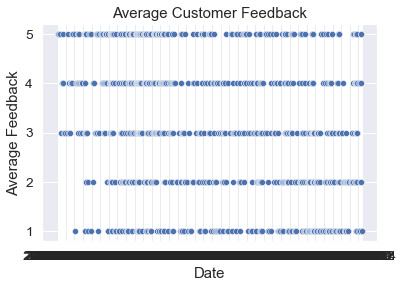

In [18]:
# The first view, I don't like it
ax_q3 = sns.scatterplot(data=sql_q3, x="Date", y="Average Feedback")
ax_q3.set(title='Average Customer Feedback')
#ax_q3.set_xticklabels(ax_q3.get_xticklabels(),rotation = 30)
plt.show()

In [19]:
# Renaming columns to make visuals prettier
sql_q3b.rename(columns={'SHIP_DATE':'Date', 'average_feedback':'Average Feedback'}, inplace=True)
sql_q3b.set_index('Date', inplace=True)
sql_q3b

,Average Feedback
Date,
2018-01-15,5.00
2018-01-17,5.00
2018-01-26,5.00
2018-01-30,3.00
2018-01-31,4.00
...,...
2019-12-10,3.25
2019-12-11,2.50
2019-12-12,2.33


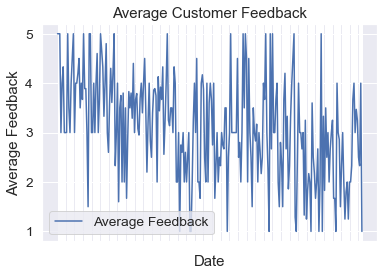

In [20]:
# Let's look at it from the other perspective
ax_q3b = sns.lineplot(data = sql_q3b)
ax_q3b.set(title='Average Customer Feedback')
ax_q3b.set(xticklabels=[])
ax_q3b.set_xlabel("Date")
ax_q3b.set_ylabel("Average Feedback")
plt.show()

In [21]:
sql_q3b.reset_index(inplace=True)
sql_q3b['Date Mo'] = sql_q3b['Date'].str[:7]
sql_q3b.drop(columns=['Date'],axis=1,inplace=True)
sql_q3b = sql_q3b.groupby('Date Mo')['Average Feedback'].mean()
sql_q3b

Date Mo
2018-01    4.400000
2018-02    3.844444
2018-03    3.849091
2018-04    3.310435
2018-05    3.444167
2018-06    3.405000
2018-07    2.414211
2018-08    3.035652
2018-09    3.172000
2018-10    2.950400
2018-11    3.010000
2018-12    4.207500
2019-01    2.465000
2019-02    2.333333
2019-03    2.110000
2019-04    1.723333
2019-05    2.497059
2019-06    2.205789
2019-07    3.835000
2019-12    2.792857
Name: Average Feedback, dtype: float64

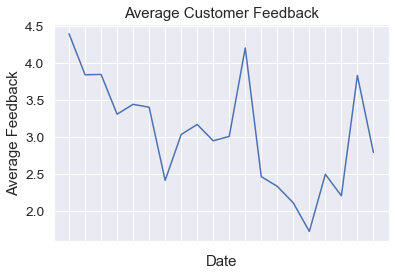

In [22]:
# Let's look at it from yet another perspective by averaging out some of the noise
ax_q3b = sns.lineplot(data = sql_q3b)
ax_q3b.set(title='Average Customer Feedback')
ax_q3b.set(xticklabels=[])
ax_q3b.set_xlabel("Date")
ax_q3b.set_ylabel("Average Feedback")
plt.show()

In [23]:
# I'd like to take one more look
# Percent of each rating by month
sql_q3c = pd.read_csv('../data/q3c_results.csv')

In [24]:
# Renaming columns to make visuals prettier
rename_dict_q3 = {
    'date_mo':'Date',
    'very_bad_rating_avg':'Very Bad Avg',
    'bad_rating_avg':'Bad Avg',
    'Okay_rating_avg':'Okay Avg',
    'good_rating_avg':'Good Avg',
    'very_good_rating_avg':'Very Good Avg',
}
sql_q3c.rename(columns=rename_dict_q3, inplace=True)
sql_q3c.head()

,Date,Very Bad Avg,Bad Avg,Okay Avg,Good Avg,Very Good Avg
0,2018-01,0.00,0.00,0.20,0.20,0.60
1,2018-02,0.03,0.00,0.24,0.48,0.24
2,2018-03,0.06,0.08,0.21,0.18,0.47
3,2018-04,0.15,0.16,0.14,0.26,0.30
4,2018-05,0.13,0.10,0.23,0.27,0.27


In [25]:
# Multiple by 100 to show percent value
sql_q3c[['Very Bad Avg', 'Bad Avg', 'Okay Avg', 'Good Avg', 'Very Good Avg']] = sql_q3c[
    ['Very Bad Avg', 'Bad Avg', 'Okay Avg', 'Good Avg', 'Very Good Avg']]*100
sql_q3c.head()

,Date,Very Bad Avg,Bad Avg,Okay Avg,Good Avg,Very Good Avg
0,2018-01,0.0,0.0,20.0,20.0,60.0
1,2018-02,3.0,0.0,24.0,48.0,24.0
2,2018-03,6.0,8.0,21.0,18.0,47.0
3,2018-04,15.0,16.0,14.0,26.0,30.0
4,2018-05,13.0,10.0,23.0,27.0,27.0


In [26]:
# Converting to integer as the points after the decimal are not needed
# Re-ordering the columns to tell a better story with the plot (trending up or down)
sql_q3c[['Very Bad Avg', 'Bad Avg', 'Okay Avg', 'Good Avg', 'Very Good Avg']] = sql_q3c[
    ['Very Bad Avg', 'Bad Avg', 'Okay Avg', 'Good Avg', 'Very Good Avg']].astype(int)

sql_q3c = sql_q3c[['Date', 'Very Good Avg', 'Good Avg', 'Okay Avg', 'Bad Avg', 'Very Bad Avg']]

sql_q3c.head()

,Date,Very Good Avg,Good Avg,Okay Avg,Bad Avg,Very Bad Avg
0,2018-01,60,20,20,0,0
1,2018-02,24,48,24,0,3
2,2018-03,47,18,21,8,6
3,2018-04,30,26,14,16,15
4,2018-05,27,27,23,10,13


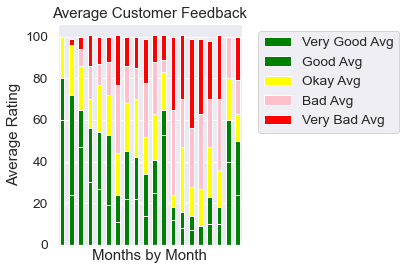

In [30]:
# create stacked bar chart for monthly ratings
sql_q3c.plot(kind='bar', stacked=True, color=['green', 'green', 'yellow', 'pink', 'red'])
 
# labels for x & y axis
plt.xlabel('Months by Month')
plt.ylabel('Average Rating')
# title of plot
plt.title('Average Customer Feedback')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xticks([])
plt.tight_layout()


In [37]:
# Renaming columns to make visuals prettier
sql_q4.rename(columns={'VEHICLE_MAKER':'Vehicle Make', 'num_customers':'Number of Customers'},inplace=True)
sql_q4 = sql_q4.head()
sql_q4

,Vehicle Make,Number of Customers
0,Chevrolet,83
1,Ford,63
2,Toyota,52
3,Dodge,50
4,Pontiac,50


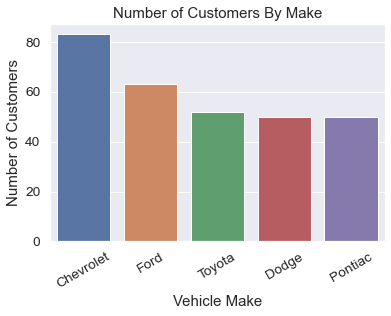

In [39]:
# Plot the average customer vehicle make preferrence from the SQL results question 4
ax_q4 = sns.barplot(x="Vehicle Make", y="Number of Customers", data=sql_q4)
ax_q4.set(title='Number of Customers By Make')
ax_q4.set_xticklabels(ax_q4.get_xticklabels(),rotation = 30)
plt.show()

In [40]:
# Many states have more than one car due to ties, especially lower volume markets
sql_q5

,STATE,VEHICLE_MAKER,order_rank,order_volume
0,Alabama,Dodge,1,5
1,Alaska,Chevrolet,1,2
2,Arizona,Pontiac,1,3
3,Arizona,Cadillac,1,3
4,Arkansas,Chevrolet,1,1
...,...,...,...,...
138,Wisconsin,Honda,1,1
139,Wisconsin,Mazda,1,1
140,Wisconsin,Nissan,1,1
141,Wisconsin,Pontiac,1,1


In [41]:
sql_q5.STATE.unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'South Carolina', 'Tennessee', 'Texas', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype=object)

In [44]:
# Renaming columns to make visuals prettier
sql_q6.rename(columns={'yearly_quarter': 'Quarter', 'order_volume': 'Order Volume'}, inplace=True)
sql_q6

,Quarter,Order Volume
0,1st Quarter,310
1,2nd Quarter,262
2,3rd Quarter,229
3,4th Quarter,199


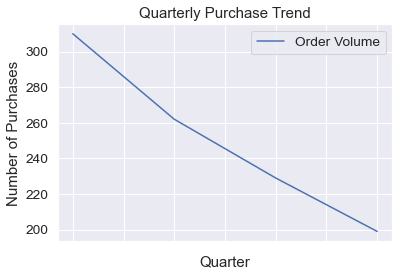

In [49]:
# Taking a look at the results from question 6
ax_q6 = sns.lineplot(data = sql_q6)
ax_q6.set(title='Quarterly Purchase Trend')
ax_q6.set(xticklabels=[])
ax_q6.set_xlabel("Quarter")
ax_q6.set_ylabel("Number of Purchases")
plt.show()

In [51]:
# Renaming columns to make visuals prettier
sql_q7.rename(columns={'yearly_quarter':'Quarters', 'q_over_q_revenue_change':'Change in Revenue (%)'},inplace=True)
sql_q7

,Quarters,Change in Revenue (%)
0,1st Quarter,0.00
1,2nd Quarter,-0.23
2,3rd Quarter,-0.10
3,4th Quarter,-0.29


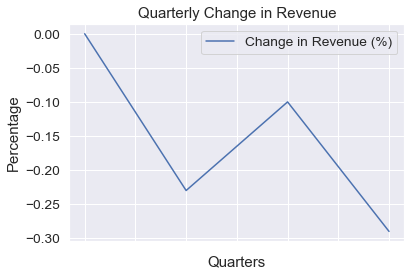

In [52]:
# Taking a look at the results from question 7
ax_q7 = sns.lineplot(data = sql_q7)
ax_q7.set(title='Quarterly Change in Revenue')
ax_q7.set(xticklabels=[])
ax_q7.set_xlabel("Quarters")
ax_q7.set_ylabel("Percentage")
plt.show()

In [54]:
# Renaming columns to make visuals prettier
columns_8 = {'yearly_quarter':'Quarters','order_volume':'Order Volume','total_revenue':'Total Revenue'}
sql_q8.rename(columns=columns_8, inplace=True)
sql_q8

,Quarters,Order Volume,Total Revenue
0,1st Quarter,310,26375015.69
1,2nd Quarter,262,21465757.25
2,3rd Quarter,229,19582283.01
3,4th Quarter,199,15182375.02


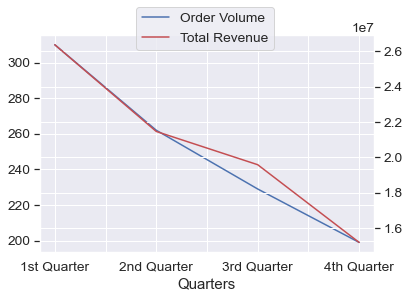

In [73]:
# Taking a look at the results from question 8
ax = sql_q8.plot(x="Quarters", y="Order Volume", legend=False)
ax2 = ax.twinx()
sql_q8.plot(x="Quarters", y="Total Revenue", ax=ax2, legend=False, color="r")
ax.figure.legend(loc='upper center')
plt.show()

In [75]:
# Renaming columns to make visuals prettier
sql_q9.rename(columns={'CREDIT_CARD_TYPE':'Credit Card', 'average_discount':'Average Discount'}, inplace=True)
sql_q9['Average Discount'] = sql_q9['Average Discount'].astype(str) + '%'
sql_q9

,Credit Card,Average Discount
0,jcb,0.61%
1,visa-electron,0.62%
2,switch,0.61%
3,diners-club-carte-blanche,0.61%
4,laser,0.64%
5,china-unionpay,0.62%
6,diners-club-enroute,0.6%
7,americanexpress,0.62%
8,mastercard,0.63%
9,visa,0.6%


In [78]:
# Renaming columns to make visuals prettier
sql_q10.rename(columns={'yearly_quarter':'Quarters','average_shipping_time':'Shipping Time Avg'}, inplace=True)
sql_q10

,Quarters,Shipping Time Avg
0,1st Quarter,57.17
1,2nd Quarter,71.11
2,3rd Quarter,117.76
3,4th Quarter,174.10


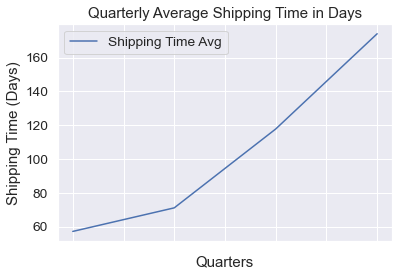

In [79]:
# Taking a look at the results from question 10
ax_q10 = sns.lineplot(data = sql_q10)
ax_q10.set(title='Quarterly Average Shipping Time in Days')
ax_q10.set(xticklabels=[])
ax_q10.set_xlabel("Quarters")
ax_q10.set_ylabel("Shipping Time (Days)")
plt.show()

### Está completo, Simplemente Muy Muy Beuno